**Exercise 1.2**: 

If $x=0.3721478693$ and $y=0.3720230572$, what is the relative error in the computation of $x-y$ using five decimal digits of accuracy?

In [1]:
x = 0.3721478693
y = 0.3720230572
sub = x - y

x_new = 0.37215
y_new = 0.37202
sub_new = x_new - y_new

relative_error = abs(sub - sub_new) / sub
print("the relative error is: %.4f" % relative_error)

the relative error is: 0.0416


**Exercise 1.3:**

Consider the two equivalent functions

$$
f(x)=x(\sqrt{x+1}-\sqrt{x})
$$

and

$$
g(x)=\frac{x}{\sqrt{x+1}+\sqrt{x}}
$$
 
Compare the function evaluation of $f(500)$ and $g(500)$ using 6 digits and rounding.

In [2]:
import numpy as np
import math
import sigfig
from sigfig import round as rd

# sigfig link:
# https://github.com/drakegroup/sigfig/blob/master/README.rst

x = 500
fx_real = x * (np.sqrt(x+1) - np.sqrt(x))
gx_real = x / (np.sqrt(x+1) + np.sqrt(x))
print("original fx and gx is:", fx_real, gx_real)

fx = rd(np.sqrt(x+1),sigfigs=6) - rd(np.sqrt(x), sigfigs=6)
fx = rd(fx * x, sigfigs=6)
fx_re = abs(fx_real - fx) / abs(fx)
gx = rd(np.sqrt(x+1), sigfigs=6) + rd(np.sqrt(x), sigfigs=6)
gx = rd(x / gx, sigfigs=6)
gx_re = abs(gx_real - gx) / abs(gx)
print("f(x)=%f, relative roundoff error is:%f" % (fx, fx_re))
print("g(x)=%f, relative roundoff error is:%f" % (gx, gx_re))

original fx and gx is: 11.174755300746853 11.174755300747199
f(x)=11.150000, relative roundoff error is:0.002220
g(x)=11.174800, relative roundoff error is:0.000004


**Exercise 1.4:**

Evaluate

$$
f(x)=x^3-6x^2+3x-0.149
$$

at $x=4.71$ using 3-digit arithmetic and calculate the relative error.

In [3]:
from sigfig import round as rd
x = 4.71
fx_raw = pow(x, 3) - 6*pow(x,2) + 3*x -0.149
fx_format = float("{0:.3g}".format(fx_raw))

fx_new = rd(pow(x,3), sigfigs=3) - rd(6*pow(x,2), sigfigs=3) + rd(3*x-0.149, sigfigs=3)
fx_new = rd(fx_new, sigfigs=3)

relative_error = abs((fx_new - fx_raw) / fx_raw)
print("relative error by using 3 digit arithmetic is %.4f" % relative_error)

relative error by using 3 digit arithmetic is 0.0248


**Exercise 1.5:**

Let $p(x)=((x^3-3x^2)+3x)-1$ and $q(x)=((x-3)x+3)x-1$

Compare the function values at $x=2.19$ (you may try different accuracy). Please explain the difference.

p(x) relative error in 3 digit: 0.008996
p(x) relative error in 4 digit: 0.003061
p(x) relative error in 5 digit: 0.003061
q(x) relative error in 3 digit: 0.002873
q(x) relative error in 4 digit: 0.000094
q(x) relative error in 5 digit: 0.000094


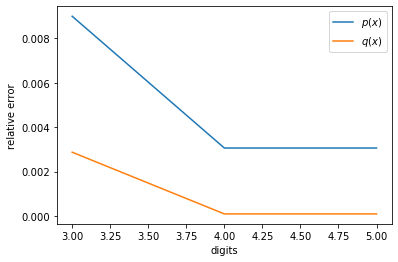

In [4]:
from sigfig import round as rd
import matplotlib.pyplot as plt
x = 2.19
px_raw = ((pow(x, 3) - 3*pow(x, 2)) + 3*x) - 1
qx_raw = ((x - 3)*x + 3) * x - 1

# 3 digit
px_3 = rd(pow(x,3), sigfigs=3) - rd(3*pow(x,2), sigfigs=3) + rd(3*x-1, sigfigs=3)
px_3 = rd(px_3, sigfigs=3)
qx_3 = rd(rd((x-3)*x+3, sigfigs=3) *x - 1, sigfigs=3)
# 4 digit
px_4 = rd(pow(x,3), sigfigs=4) - rd(3*pow(x,2), sigfigs=4) + 3*x-1
px_4 = rd(px_4, sigfigs=4)
qx_4 = rd(rd((x-3)*x+3, sigfigs=4) *x - 1, sigfigs=4)
# 5 digit
px_5 = rd(pow(x,3), sigfigs=5) - rd(3*pow(x,2), sigfigs=5) + 3*x-1
px_5 = rd(px_4, sigfigs=3)
qx_5 = rd(((x-3)*x+3) *x - 1, sigfigs=4)

# error
print("p(x) relative error in 3 digit: %f" % abs((px_3-px_raw)/px_raw))
print("p(x) relative error in 4 digit: %f" % abs((px_4-px_raw)/px_raw))
print("p(x) relative error in 5 digit: %f" % abs((px_5-px_raw)/px_raw))
print("q(x) relative error in 3 digit: %f" % abs((qx_3-qx_raw)/qx_raw))
print("q(x) relative error in 4 digit: %f" % abs((qx_4-qx_raw)/qx_raw))
print("q(x) relative error in 5 digit: %f" % abs((qx_5-qx_raw)/qx_raw))

# plot
x = [3, 4, 5]
y_p = [abs((px_3-px_raw)/px_raw), abs((px_4-px_raw)/px_raw), abs((px_5-px_raw)/px_raw)]
y_q = [abs((qx_3-qx_raw)/qx_raw), abs((qx_4-qx_raw)/qx_raw), abs((qx_5-qx_raw)/qx_raw)]
fig, ax = plt.subplots()
ax.plot(x, y_p, label="$p(x)$")
ax.plot(x, y_q, label="$q(x)$")
plt.xlabel('digits')
plt.ylabel('relative error')
plt.legend()
plt.show()

the trend of relative error of $p(x)$ and $q(x)$ is presented in this figure.

It can be concluded that 
* by using **higher digits arithmetic**, higher the precison will be;
* by performing **less multiplication process**, higher the precision will be;

**Exercise 1.7:**

$$
f(x)=\sqrt{1+x^2}-1
$$

Explain the difficulty of computing f(x) for small value of $|x|$ and show how it can be circumvented.

* When $x$ is quite small, which means $|x|$ is definitely less than $1$ and $x\rightarrow 0$.

* It's obvious that $x^2<x$ while $0<x<1$, and actually $x^2$ is high-order infinitesimal of $x$;

* after the `sqrt` operation, $x^2$ almost has nothing to do with the final of $\sqrt{1+x^2}$ which is nearly equal to $1$;

So it's difficult for computing $f(x)$ while $|x|$ is small.

However, we can use $\sqrt{x^2+1}-1$'s equivalent infinitesimal, which is $\frac12 x^2$, and it can be proved.

$$
\lim_{x \to 0} \cfrac{\sqrt{1+x^2}-1}{\cfrac12 x^2}=
\lim_{x \to 0} \cfrac{\cfrac12 \times 2x}{\cfrac12 \times 2x} = 1
$$

the method is, while $|x|$ is quite small, we shall use $\frac12 x^2$ instead of $\sqrt{x^2+1}-1$

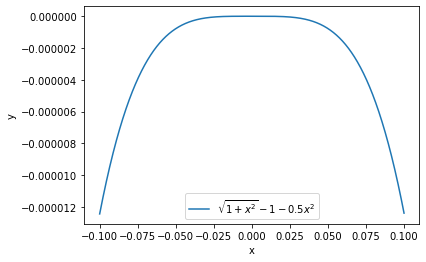

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-0.1, 0.1, 0.0001)
y = np.sqrt(1 + pow(x, 2)) - 1 - 0.5*pow(x,2)

plt.plot(x, y, label="$\sqrt{1+x^2}-1-0.5x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Exercise 1.11:**

Consider the algebraic equation

$$
x^n+x^{n-1}-a=0, a>0, n>=2
$$

Show that there is exactly one positive root $\xi(a)$

set function
$$
f(x)=x^n+x^{n-1}-a
$$

It's obvious that $f(0)=-a<0$

the derivative of $f(x)$ is $f'(x) = nx^{n-1}+(n-1)x^{n-2}$

we can know that $f'(0)=0, f'(x) > 0$ for every $x>0$

what's more,

$$
\lim_{x \to \infty}f(x) = + \infty
$$

so the function keeps increasing while $x>0$, from a negative $-a$ to $+\infty$, and there exactly will be a positive root $\xi (a)$